# Contexto de la Base de Datos

Esta base de datos trata sobre Dos hoteles, que tienen 31 variables descriptivas, cada regsitro representa una reservacion
del hotel. El dataSet se basa en las llegadas a un hotel desde el primero de Julio del 2015 hasta el 31 de Agosto del 2017
--> Resort hotel: Un hotel de Campo
    Este resort tiene 40,060 registros
--> City Hotel: un hotel de Ciudad
    Este hotel tiene 79,330 registros
Esta base de datos cuenta con 119,390 registros en total


# Contexto de las variables de la BD

Son demasiadas, mejor dejo anexado el documento original, que explica que es cada una y su contexto

# LIBRERIAS NECESARIAS

In [1]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#Se agregarán más en cuanto avance el temario de clase


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Objetivo del Análisis Estadístico

El objetivo del estudio de este conjunto de datos es entender el negocio de la industria hotelera, en este estudio se busca encontrar las diferencias entre los clientes de un hotel de ciudad vs un hotel resorte. En este reporte se buscarán las características de los visitantes

# Lectura de la Base de Datos

In [3]:
df = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/HotelResortvsCity/hotel_bookings.csv") #Asi el python puede leer la BD que es un CSV (COMA SEPARATED VALUES)

In [4]:
dfnd=df.drop_duplicates()

In [5]:
#limites del dataset son [0,119390]

tam_muestra = 41786
hoteles = dfnd.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 41786 registros


In [6]:
hoteles.info()
#Vemos los resultados obtenidos con el cambio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41786 entries, 41000 to 20487
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           41786 non-null  object 
 1   is_canceled                     41786 non-null  int64  
 2   lead_time                       41786 non-null  int64  
 3   arrival_date_year               41786 non-null  int64  
 4   arrival_date_month              41786 non-null  object 
 5   arrival_date_week_number        41786 non-null  int64  
 6   arrival_date_day_of_month       41786 non-null  int64  
 7   stays_in_weekend_nights         41786 non-null  int64  
 8   stays_in_week_nights            41786 non-null  int64  
 9   adults                          41786 non-null  int64  
 10  children                        41783 non-null  float64
 11  babies                          41786 non-null  int64  
 12  meal                        

In [7]:
hoteles.info() # Esta linea sirve para mostrar la cantidad de registros x variable y que tipo de datos son

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41786 entries, 41000 to 20487
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           41786 non-null  object 
 1   is_canceled                     41786 non-null  int64  
 2   lead_time                       41786 non-null  int64  
 3   arrival_date_year               41786 non-null  int64  
 4   arrival_date_month              41786 non-null  object 
 5   arrival_date_week_number        41786 non-null  int64  
 6   arrival_date_day_of_month       41786 non-null  int64  
 7   stays_in_weekend_nights         41786 non-null  int64  
 8   stays_in_week_nights            41786 non-null  int64  
 9   adults                          41786 non-null  int64  
 10  children                        41783 non-null  float64
 11  babies                          41786 non-null  int64  
 12  meal                        

In [8]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e74178c97e190851eb982b305014a334b79359236a38236af9b8ce098755b85b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [9]:
import ydata_profiling
ydata_profiling.ProfileReport(hoteles)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

<Figure size 600x400 with 0 Axes>

In [10]:
hoteles.nunique() # Esto sirve para ver cuantos valores diferentes hay por cada variable
#Es importante saber esto asi podemos reconocer que variable es númerica y cúal es categórica
#Las variables que tienen menos de 15 valores diferentes se pueden decir que son cátegoricas



hotel                                2
is_canceled                          2
lead_time                          450
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                30
adults                              10
children                             4
babies                               4
meal                                 5
country                            153
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              13
previous_bookings_not_canceled      55
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     17
deposit_type                         3
agent                              287
company                            291
days_in_waiting_list     

In [11]:
#En python existe una función llamada describe la cual permite obtener las medidas de localizacion de las variables
# de un dataSet, pero no tiene sentido usarlas en variables categóricas, por lo cual se deben identificar estas
# antes de usar la funcion describe, ya que no tiene sentido buscar la media o desv estandar para dichas variables
to_factor = list(hoteles.loc[:,hoteles.nunique() <= 15]);
#Esta variable almacenará las variables que tengan menos de 16 valores de datos diferentes, por medio de la técnica llamada
#List comprehenssion
hoteles[to_factor] = hoteles[to_factor].astype('category')
#Una vez identificadas le decimos que en el dataSet las variables que fueron detectadas en la variable factor, las haremos
#tipo categoricas


In [12]:
resort = hoteles.loc[(hoteles["hotel"] == "Resort Hotel")]
ciudad = hoteles.loc[(hoteles["hotel"] == "City Hotel")]

# Estudio De Las Variables

In [13]:
#Ya podemos aplicar un describe a las variables númericas, ya que en estas variables si nos dara una información util
hoteles.describe()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
count  41786.000000              41786.000000               41786.000000   
mean      80.077538                 26.878428                  15.815177   
std       86.274535                 13.646190                   8.845404   
min        0.000000                  1.000000                   1.000000   
25%       11.000000                 16.000000                   8.000000   
50%       49.000000                 27.000000                  16.000000   
75%      125.000000                 37.000000                  24.000000   
max      709.000000                 53.000000                  31.000000   

       stays_in_week_nights  previous_bookings_not_canceled  booking_changes  \
count          41786.000000                    41786.000000     41786.000000   
mean               2.622194                        0.199445         0.274709   
std                2.053960                        1.846612         0.722129   
min                0.000000                        0.000000         0.000000   
25%                1.000000                        0.000000         0.000000   
50%                2.000000                        0.000000         0.000000   
75%                4.000000                        0.000000         0.000000   
max               42.000000                       72.000000        18.000000   

              agent      company  days_in_waiting_list           adr  
count  36034.000000  2523.000000          41786.000000  41786.000000  
mean      93.688128   182.782798              0.833341    106.570818  
std      112.963531   129.671251             10.744449     52.069366  
min        1.000000     8.000000              0.000000     -6.380000  
25%        9.000000    47.000000              0.000000     72.250000  
50%       14.000000   169.000000              0.000000     98.100000  
75%      240.000000   268.000000              0.000000    134.300000  
max      535.000000   543.000000            391.000000    508.000000

In [14]:
#Estudio de Variables Numericas
ciudad.describe()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
count  25656.000000              25656.000000               25656.000000   
mean      77.922981                 26.678204                  15.787964   
std       82.353808                 13.573168                   8.803851   
min        0.000000                  1.000000                   1.000000   
25%       13.000000                 16.000000                   8.000000   
50%       51.000000                 27.000000                  16.000000   
75%      118.000000                 37.000000                  23.000000   
max      629.000000                 53.000000                  31.000000   

       stays_in_week_nights  previous_bookings_not_canceled  booking_changes  \
count          25656.000000                    25656.000000     25656.000000   
mean               2.262161                        0.213244         0.249065   
std                1.604354                        2.171773         0.699318   
min                0.000000                        0.000000         0.000000   
25%                1.000000                        0.000000         0.000000   
50%                2.000000                        0.000000         0.000000   
75%                3.000000                        0.000000         0.000000   
max               34.000000                       72.000000        18.000000   

              agent      company  days_in_waiting_list           adr  
count  22978.000000  1342.000000          25656.000000  25656.000000  
mean      22.641657   137.289121              1.094325    111.007202  
std       46.561592   117.116734             12.600176     42.182921  
min        1.000000     8.000000              0.000000      0.000000  
25%        9.000000    40.000000              0.000000     83.745000  
50%        9.000000    81.000000              0.000000    105.300000  
75%       11.000000   218.000000              0.000000    134.100000  
max      509.000000   497.000000            391.000000    451.500000

la variable lead_time tiene un valor máximo raro como puede ser el máximo, ya que 629 días de espera desde la reserva hasta la llegada al hotel me parece exagerado, puede ser un outlier o un caso raro como un plan de vacaciones de graduacion o una boda planeada para esa fecha. Lo mismo para las noches de fin de semana y entre semana, ya que 41 noches en un hotel parece exagerado


In [15]:
#Estudio de Variables Categoricas
ciudad.describe(exclude = np.number)

hotel  is_canceled  arrival_date_year arrival_date_month  \
count        25656        25656              25656              25656   
unique           1            2                  3                 12   
top     City Hotel            0               2016             August   
freq         25656        17972              12836               3091   

        stays_in_weekend_nights  adults  children  babies   meal country  ...  \
count                     25656   25656   25653.0   25656  25656   25654  ...   
unique                       12       5       4.0       4      4     144  ...   
top                           0       2       0.0       0     BB     PRT  ...   
freq                      11317   18141   23266.0   25493  19794    6406  ...   

       is_repeated_guest previous_cancellations  reserved_room_type  \
count              25656                  25656               25656   
unique                 2                     10                   8   
top                    0                      0                   A   
freq               24790                  25077               18179   

        assigned_room_type deposit_type customer_type  \
count                25656        25656         25656   
unique                   9            3             4   
top                      A   No Deposit     Transient   
freq                 15978        25238         21412   

       required_car_parking_spaces total_of_special_requests  \
count                        25656                     25656   
unique                           4                         6   
top                              0                         0   
freq                         24695                     12694   

        reservation_status  reservation_status_date  
count                25656                    25656  
unique                   3                      846  
top              Check-Out               2015-10-21  
freq                 17972                       81  

[4 rows x 22 columns]

Las variables que nos interesan de aqui son: is_canceled para saber que tantas reservas son canceladas, arrival_date_month para ver los meses máximos y mínimos, Repeated_guest para ver cuantos clientes vuelven y con que frecuencia

In [16]:
#Estudio Resort
resort.describe()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
count  16130.000000              16130.000000               16130.000000   
mean      83.504526                 27.196900                  15.858462   
std       92.066579                 13.755959                   8.911201   
min        0.000000                  1.000000                   1.000000   
25%        8.000000                 16.000000                   8.000000   
50%       46.000000                 28.000000                  16.000000   
75%      138.000000                 37.000000                  24.000000   
max      709.000000                 53.000000                  31.000000   

       stays_in_week_nights  previous_bookings_not_canceled  booking_changes  \
count          16130.000000                    16130.000000     16130.000000   
mean               3.194854                        0.177495         0.315499   
std                2.510201                        1.153720         0.755225   
min                0.000000                        0.000000         0.000000   
25%                1.000000                        0.000000         0.000000   
50%                3.000000                        0.000000         0.000000   
75%                5.000000                        0.000000         0.000000   
max               42.000000                       30.000000        17.000000   

              agent      company  days_in_waiting_list           adr  
count  13056.000000  1181.000000          16130.000000  16130.000000  
mean     218.726869   234.478408              0.418227     99.514410  
std       82.976271   123.779659              6.801640     64.128383  
min        1.000000     9.000000              0.000000     -6.380000  
25%      240.000000   148.000000              0.000000     51.850000  
50%      240.000000   223.000000              0.000000     80.000000  
75%      241.000000   308.000000              0.000000    135.000000  
max      535.000000   543.000000            185.000000    508.000000

In [17]:
min_value_index = resort['adr'].idxmin()
resort.loc[min_value_index, 'adr'] = 0.00


Este escenario se repite para el Hotel resort, quiza solo es un caso raro.
En este describe podemos encontrar que hay un ADR (Average Daily Rate) negativo, algo que no tiene sentido alguno no, por lo que lo que se debe hacer algo al respecto

In [18]:
resort.describe()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
count  16130.000000              16130.000000               16130.000000   
mean      83.504526                 27.196900                  15.858462   
std       92.066579                 13.755959                   8.911201   
min        0.000000                  1.000000                   1.000000   
25%        8.000000                 16.000000                   8.000000   
50%       46.000000                 28.000000                  16.000000   
75%      138.000000                 37.000000                  24.000000   
max      709.000000                 53.000000                  31.000000   

       stays_in_week_nights  previous_bookings_not_canceled  booking_changes  \
count          16130.000000                    16130.000000     16130.000000   
mean               3.194854                        0.177495         0.315499   
std                2.510201                        1.153720         0.755225   
min                0.000000                        0.000000         0.000000   
25%                1.000000                        0.000000         0.000000   
50%                3.000000                        0.000000         0.000000   
75%                5.000000                        0.000000         0.000000   
max               42.000000                       30.000000        17.000000   

              agent      company  days_in_waiting_list           adr  
count  13056.000000  1181.000000          16130.000000  16130.000000  
mean     218.726869   234.478408              0.418227     99.514805  
std       82.976271   123.779659              6.801640     64.127749  
min        1.000000     9.000000              0.000000      0.000000  
25%      240.000000   148.000000              0.000000     51.850000  
50%      240.000000   223.000000              0.000000     80.000000  
75%      241.000000   308.000000              0.000000    135.000000  
max      535.000000   543.000000            185.000000    508.000000

In [19]:
#Estudio de Variables Categoricas
resort.describe(exclude = np.number)

hotel  is_canceled  arrival_date_year arrival_date_month  \
count          16130        16130              16130              16130   
unique             1            2                  3                 12   
top     Resort Hotel            0               2016             August   
freq           16130        12387               7380               2253   

        stays_in_weekend_nights  adults  children  babies   meal country  ...  \
count                     16130   16130   16130.0   16130  16130   15924  ...   
unique                       14      10       4.0       3      5     108  ...   
top                           2       2       0.0       0     BB     PRT  ...   
freq                       5720   12561   14513.0   15862  12650    6726  ...   

       is_repeated_guest previous_cancellations  reserved_room_type  \
count              16130                  16130               16130   
unique                 2                      8                   8   
top                    0                      0                   A   
freq               15308                  15889                8815   

        assigned_room_type deposit_type customer_type  \
count                16130        16130         16130   
unique                  10            3             4   
top                      A   No Deposit     Transient   
freq                  6152        16007         12976   

       required_car_parking_spaces total_of_special_requests  \
count                        16130                     16130   
unique                           3                         6   
top                              0                         0   
freq                         13569                      8243   

        reservation_status  reservation_status_date  
count                16130                    16130  
unique                   3                      889  
top              Check-Out               2017-05-25  
freq                 12387                       59  

[4 rows x 22 columns]

Nos interesa estudiar las mismas variables para poder hacer comparaciones entre los dos hoteles

# Historiogramas

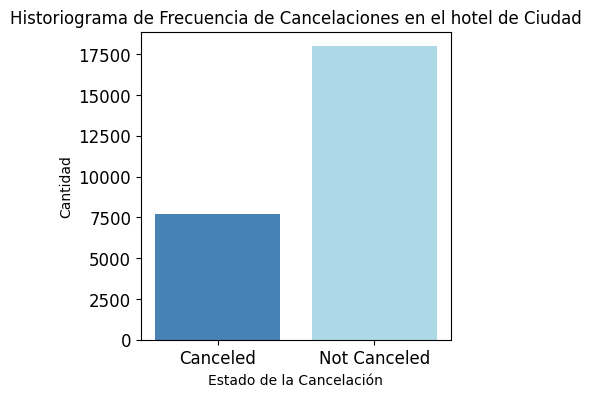

In [20]:
#Historiograma de Frecuencia
plt.figure(figsize=(4, 4))
plt.title('Historiograma de Frecuencia de Cancelaciones en el hotel de Ciudad')

cancelados = len(hoteles.loc[(hoteles.is_canceled == 1) & (hoteles.hotel == 'City Hotel')])
no_cancelados = len(hoteles.loc[(hoteles.is_canceled == 0) & (hoteles.hotel == 'City Hotel')])

plt.bar(['Canceled', 'Not Canceled'], [cancelados, no_cancelados], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


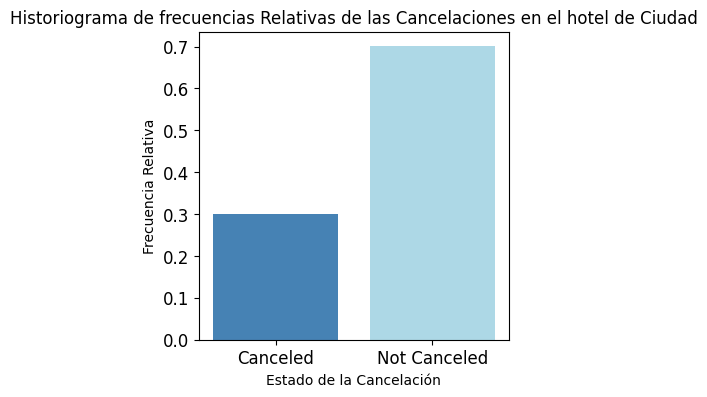

In [21]:
#Historiograma de frecuencia Relativa
plt.figure(figsize=(4, 4))
plt.title('Historiograma de frecuencias Relativas de las Cancelaciones en el hotel de Ciudad')

cancelados = len(hoteles.loc[(hoteles.is_canceled == 1) & (hoteles.hotel == 'City Hotel')])
no_cancelados = len(hoteles.loc[(hoteles.is_canceled == 0) & (hoteles.hotel == 'City Hotel')])
total = cancelados + no_cancelados

cancelados_rel = cancelados / total
no_cancelados_rel = no_cancelados / total

plt.bar(['Canceled', 'Not Canceled'], [cancelados_rel, no_cancelados_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


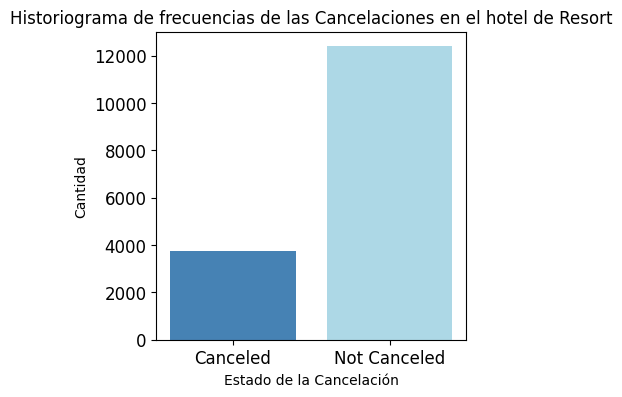

In [22]:
#Historiograma de Frecuencia
plt.figure(figsize=(4, 4))
plt.title('Historiograma de frecuencias de las Cancelaciones en el hotel de Resort')

cancelados = len(hoteles.loc[(hoteles.is_canceled == 1) & (hoteles.hotel == 'Resort Hotel')])
no_cancelados = len(hoteles.loc[(hoteles.is_canceled == 0) & (hoteles.hotel == 'Resort Hotel')])

plt.bar(['Canceled', 'Not Canceled'], [cancelados, no_cancelados], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


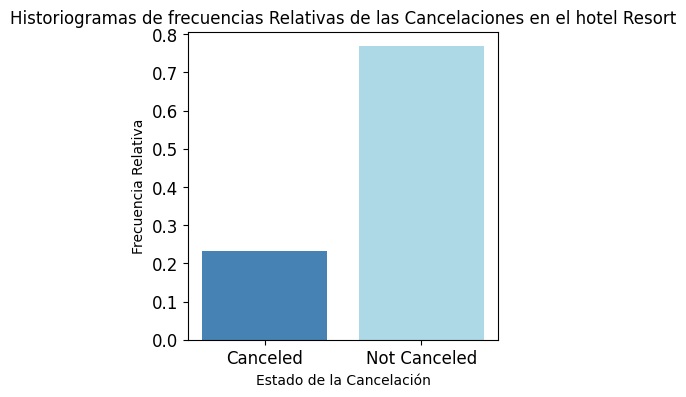

In [23]:
#Historiograma de frecuencia Relativa
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de las Cancelaciones en el hotel Resort')

cancelados = len(hoteles.loc[(hoteles.is_canceled == 1) & (hoteles.hotel == 'Resort Hotel')])
no_cancelados = len(hoteles.loc[(hoteles.is_canceled == 0) & (hoteles.hotel == 'Resort Hotel')])
total = cancelados + no_cancelados

cancelados_rel = cancelados / total
no_cancelados_rel = no_cancelados / total

plt.bar(['Canceled', 'Not Canceled'], [cancelados_rel, no_cancelados_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Podemos observar que la gente que reserva el Resort cancela considerablemente menos reservas que la gente que reserva el hotel de ciudad

# Historiograma de Frecuencia Resort

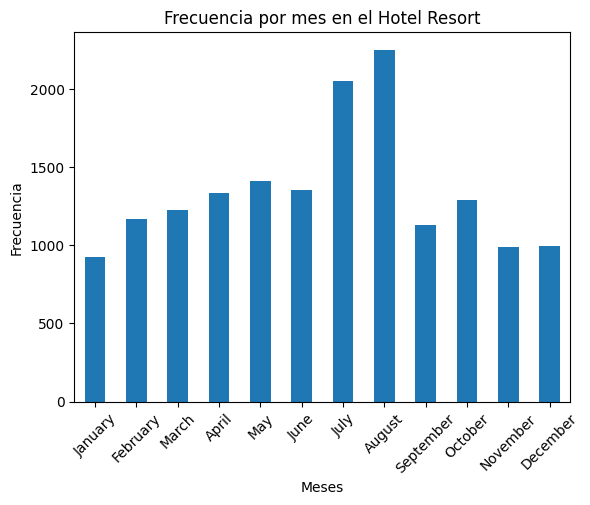

In [24]:

# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
resort_hotel = hoteles.loc[hoteles['hotel'] == 'Resort Hotel'].copy()

# Crear un diccionario para mapear los meses a un orden personalizado
meses_ordenados = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                   'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Convertir la columna "arrival_date_month" a tipo categórico y reordenar las categorías
resort_hotel['arrival_date_month'] = pd.Categorical(resort_hotel['arrival_date_month'], categories=list(meses_ordenados.keys()), ordered=True)

# Ordenar el DataFrame por el mes de llegada
resort_hotel = resort_hotel.sort_values('arrival_date_month')

# Obtener el conteo de visitantes por mes con las categorías reordenadas
visitantesxmesResort = resort_hotel['arrival_date_month'].value_counts().sort_index()

# Crear el histograma de frecuencia
visitantesxmesResort.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia por mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


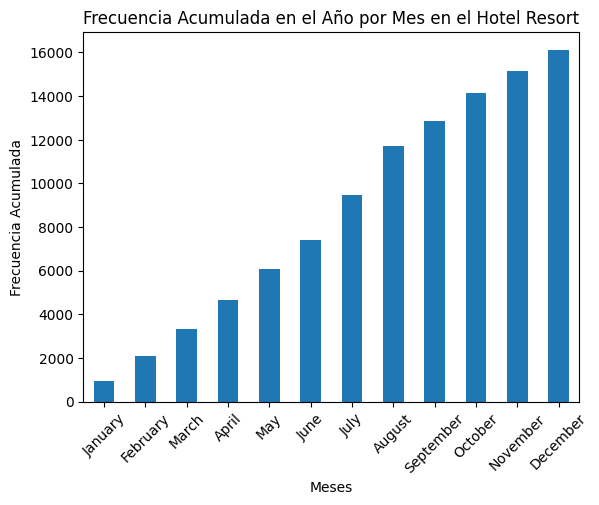

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
resort_hotel = hoteles.loc[hoteles['hotel'] == 'Resort Hotel'].copy()
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Obtener el conteo de visitantes por mes
visitantesxmesResort = resort_hotel['arrival_date_month'].value_counts().sort_index()
visitantesxmesResort = visitantesxmesResort.reindex(meses_ordenados)
# Calcular la frecuencia relativa dividiendo el conteo por el número total de visitantes

# Calcular la frecuencia acumulada sumando los valores acumulativamente
frecuencia_acumulada = visitantesxmesResort.cumsum()

# Crear el gráfico de línea de frecuencia acumulada
frecuencia_acumulada.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia Acumulada en el Año por Mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia Acumulada')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



# Historiograma de Frecuencia Relativa

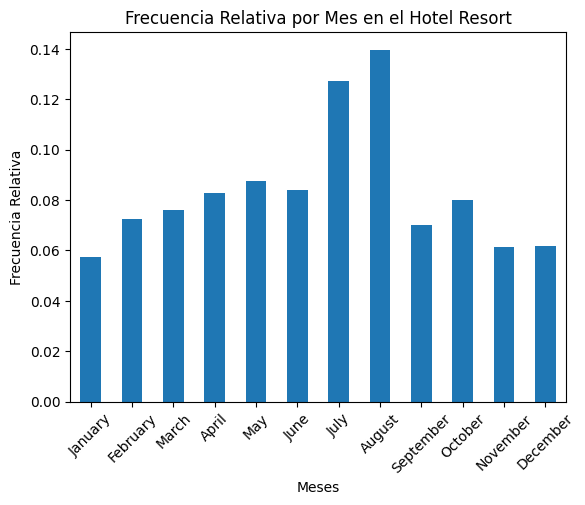

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
resort_hotel = hoteles.loc[hoteles['hotel'] == 'Resort Hotel'].copy()

# Obtener el conteo de visitantes por mes
visitantesxmesResort = resort_hotel['arrival_date_month'].value_counts().sort_index()

# Calcular la frecuencia relativa dividiendo el conteo por el número total de visitantes
frecuencia_relativa = visitantesxmesResort / resort_hotel.shape[0]

# Crear una lista ordenada de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindexar la serie de frecuencia relativa con los meses ordenados
frecuencia_relativa = frecuencia_relativa.reindex(meses_ordenados)

# Crear el gráfico de barras de frecuencia relativa
frecuencia_relativa.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia Relativa por Mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia Relativa')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



# Historiograma de Frecuencia Acumulativa Relativa Resort

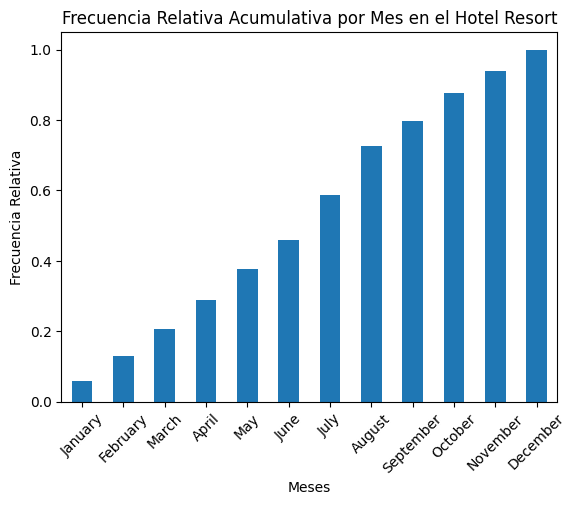

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
resort_hotel = hoteles.loc[hoteles['hotel'] == 'Resort Hotel'].copy()

# Obtener el conteo de visitantes por mes
visitantesxmesResort = resort_hotel['arrival_date_month'].value_counts().sort_index()

# Calcular la frecuencia relativa dividiendo el conteo por el número total de visitantes
frecuencia_relativa = visitantesxmesResort / resort_hotel.shape[0]

# Crear una lista ordenada de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindexar la serie de frecuencia relativa con los meses ordenados
frecuencia_relativa = frecuencia_relativa.reindex(meses_ordenados)
frecuencia_acumulada = frecuencia_relativa.cumsum()
frecuencia_acumulada = frecuencia_acumulada.reindex(meses_ordenados)
# Crear el gráfico de barras de frecuencia relativa
frecuencia_acumulada.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia Relativa Acumulativa por Mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia Relativa')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



# Análisis de los historiogramas

Viendo los resultados de los historiogramas podemos observar  que los meses más visitados son: Julio y Agosto. Al ver que estos son los meses más frecuentados nos damos cuenta que son meses de verano, que por lo general, es cuando la gente de los países primermundistas toman su break de vacaciones. Haria falta un análisis mediante  gráficas para revisar de que nacionalidad es la que más frecuento este hotel.

Observando los resultados nos damos cuenta que los meses menos frecuentados fueron Enero, Noviembre y Diciembre. Probablemente esto ocurra porque los precios en las Aerolineas tienden a subir durante época de fiestas. Otro punto es la disponibilidad de las personas ya que muchos ya han gastado sus días libres en época de verano. También puede ser que la gente prefiera estar unida con toda su familia en época de Navidad y Año Nuevo.

# Historiograma de Frecuencia Hotel de Ciudad

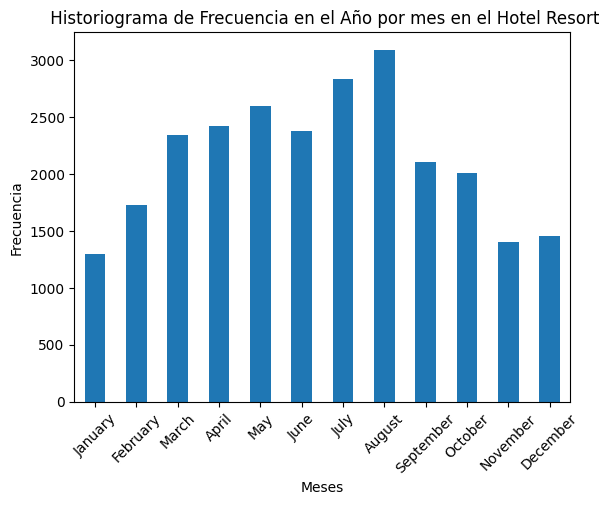

In [28]:
# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
city_hotel = hoteles.loc[hoteles['hotel'] == 'City Hotel'].copy()

# Crear un diccionario para mapear los meses a un orden personalizado
meses_ordenados = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                   'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Convertir la columna "arrival_date_month" a tipo categórico y reordenar las categorías
city_hotel['arrival_date_month'] = pd.Categorical(city_hotel['arrival_date_month'], categories=list(meses_ordenados.keys()), ordered=True)

# Ordenar el DataFrame por el mes de llegada
city_hotel = city_hotel.sort_values('arrival_date_month')

# Obtener el conteo de visitantes por mes con las categorías reordenadas
visitantesxmesCity = city_hotel['arrival_date_month'].value_counts().sort_index()

# Crear el histograma de frecuencia
visitantesxmesCity.plot(kind='bar')

# Personalizar el gráfico
plt.title(' Historiograma de Frecuencia en el Año por mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


# Historiograma de Frecuencia Acumulada de Ciudad

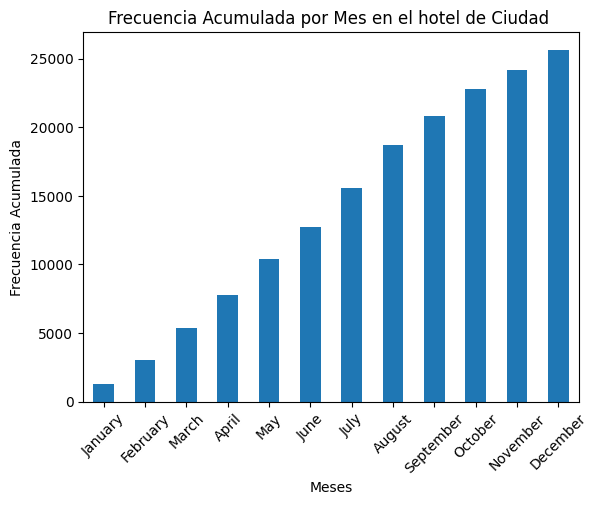

In [29]:

# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
city_hotel = hoteles.loc[hoteles['hotel'] == 'City Hotel'].copy()
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Obtener el conteo de visitantes por mes
visitantesxmesCity = city_hotel['arrival_date_month'].value_counts().sort_index()
visitantesxmesCity = visitantesxmesCity.reindex(meses_ordenados)
# Calcular la frecuencia relativa dividiendo el conteo por el número total de visitantes

# Calcular la frecuencia acumulada sumando los valores acumulativamente
frecuencia_acumulada = visitantesxmesCity.cumsum()

# Crear el gráfico de línea de frecuencia acumulada
frecuencia_acumulada.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia Acumulada por Mes en el hotel de Ciudad ')
plt.xlabel('Meses')
plt.ylabel('Frecuencia Acumulada')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Frecuencia Relativa  Hotel Ciudad

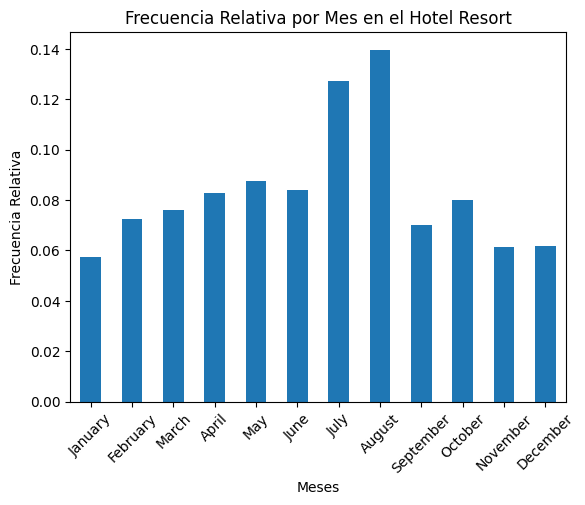

In [30]:
# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
city_hotel = hoteles.loc[hoteles['hotel'] == 'Resort Hotel'].copy()

# Obtener el conteo de visitantes por mes
visitantesxmesCity = city_hotel['arrival_date_month'].value_counts().sort_index()

# Calcular la frecuencia relativa dividiendo el conteo por el número total de visitantes
frecuencia_relativa = visitantesxmesCity / city_hotel.shape[0]

# Crear una lista ordenada de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindexar la serie de frecuencia relativa con los meses ordenados
frecuencia_relativa = frecuencia_relativa.reindex(meses_ordenados)

# Crear el gráfico de barras de frecuencia relativa
frecuencia_relativa.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia Relativa por Mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia Relativa')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Historiograma de Frecuencia Relativa Acumulada Hotel Ciudad

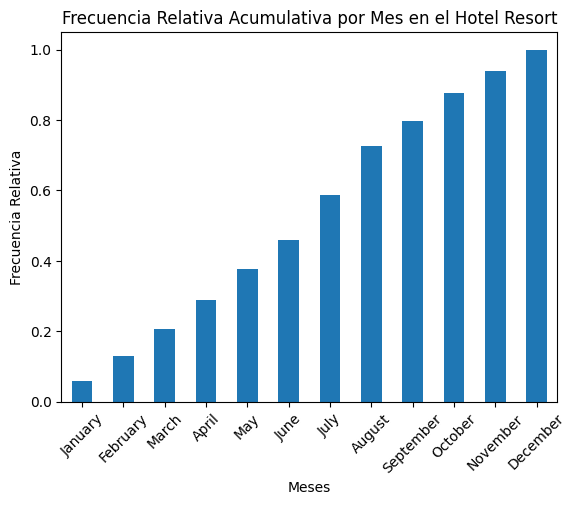

In [31]:

# Supongamos que tienes un DataFrame llamado "hoteles" con las columnas "arrival_date_month" y "hotel"

# Filtrar los datos para el hotel "Resort Hotel"
hotel_city = hoteles.loc[hoteles['hotel'] == 'Resort Hotel'].copy()

# Obtener el conteo de visitantes por mes
visitantesxmesCity = hotel_city['arrival_date_month'].value_counts().sort_index()

# Calcular la frecuencia relativa dividiendo el conteo por el número total de visitantes
frecuencia_relativa = visitantesxmesCity / hotel_city.shape[0]

# Crear una lista ordenada de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindexar la serie de frecuencia relativa con los meses ordenados
frecuencia_relativa = frecuencia_relativa.reindex(meses_ordenados)
frecuencia_acumulada = frecuencia_relativa.cumsum()
frecuencia_acumulada = frecuencia_acumulada.reindex(meses_ordenados)
# Crear el gráfico de barras de frecuencia relativa
frecuencia_acumulada.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencia Relativa Acumulativa por Mes en el Hotel Resort')
plt.xlabel('Meses')
plt.ylabel('Frecuencia Relativa')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


# Conclusiones del Hotel de Ciudad

Se ven los mismos patrones encontrados en el hotel Resort, ambas temporadas tienen mismo comportamiento en ambos hoteles, solo que podemos ver que hay bastante más clientes que se inclinan por el Hotel de Ciudad. Esto se deberá probablemente a que la gente prefiere estar cerca de las atracciones turisticas fuera del hotel y disfrutar más en la ciudad en sí que en las instalaciones del Hotel.

# Analisis de los visitantes que vuelven por Segunda Vez

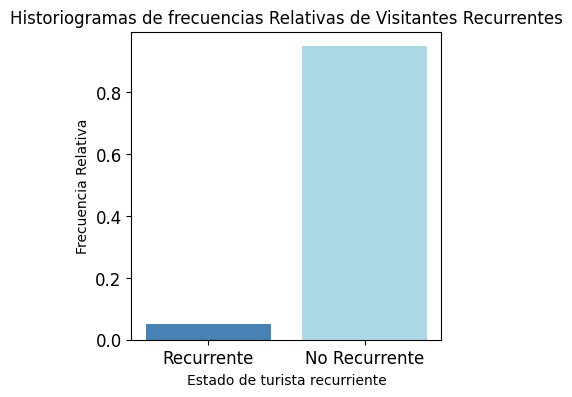

In [32]:
#Historiograma de frecuencia Relativa
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de Visitantes Recurrentes')

recurrentes = len(hoteles.loc[(hoteles.is_repeated_guest == 1) & (hoteles.hotel == 'Resort Hotel')])
no_recurrentes = len(hoteles.loc[(hoteles.is_repeated_guest == 0) & (hoteles.hotel == 'Resort Hotel')])
total = recurrentes + no_recurrentes

recurrentes_rel = recurrentes / total
no_recurrentes_rel = no_recurrentes / total

plt.bar(['Recurrente', 'No Recurrente'], [recurrentes_rel, no_recurrentes_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de turista recurriente')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



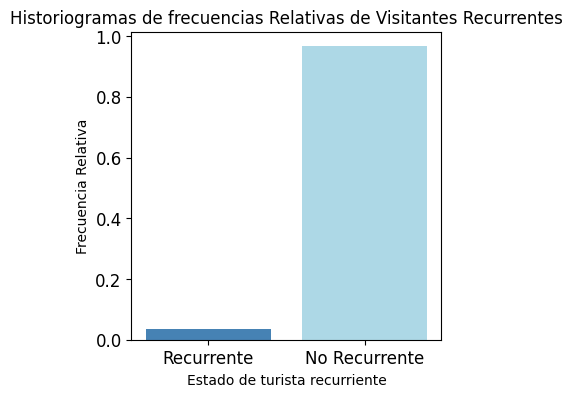

In [33]:
#Historiograma de frecuencia Relativa
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de Visitantes Recurrentes')

recurrentes = len(hoteles.loc[(hoteles.is_repeated_guest == 1) & (hoteles.hotel == 'City Hotel')])
no_recurrentes = len(hoteles.loc[(hoteles.is_repeated_guest == 0) & (hoteles.hotel == 'City Hotel')])
total = recurrentes + no_recurrentes

recurrentes_rel = recurrentes / total
no_recurrentes_rel = no_recurrentes / total

plt.bar(['Recurrente', 'No Recurrente'], [recurrentes_rel, no_recurrentes_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de turista recurriente')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



<ipython-input-34-42558892277e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


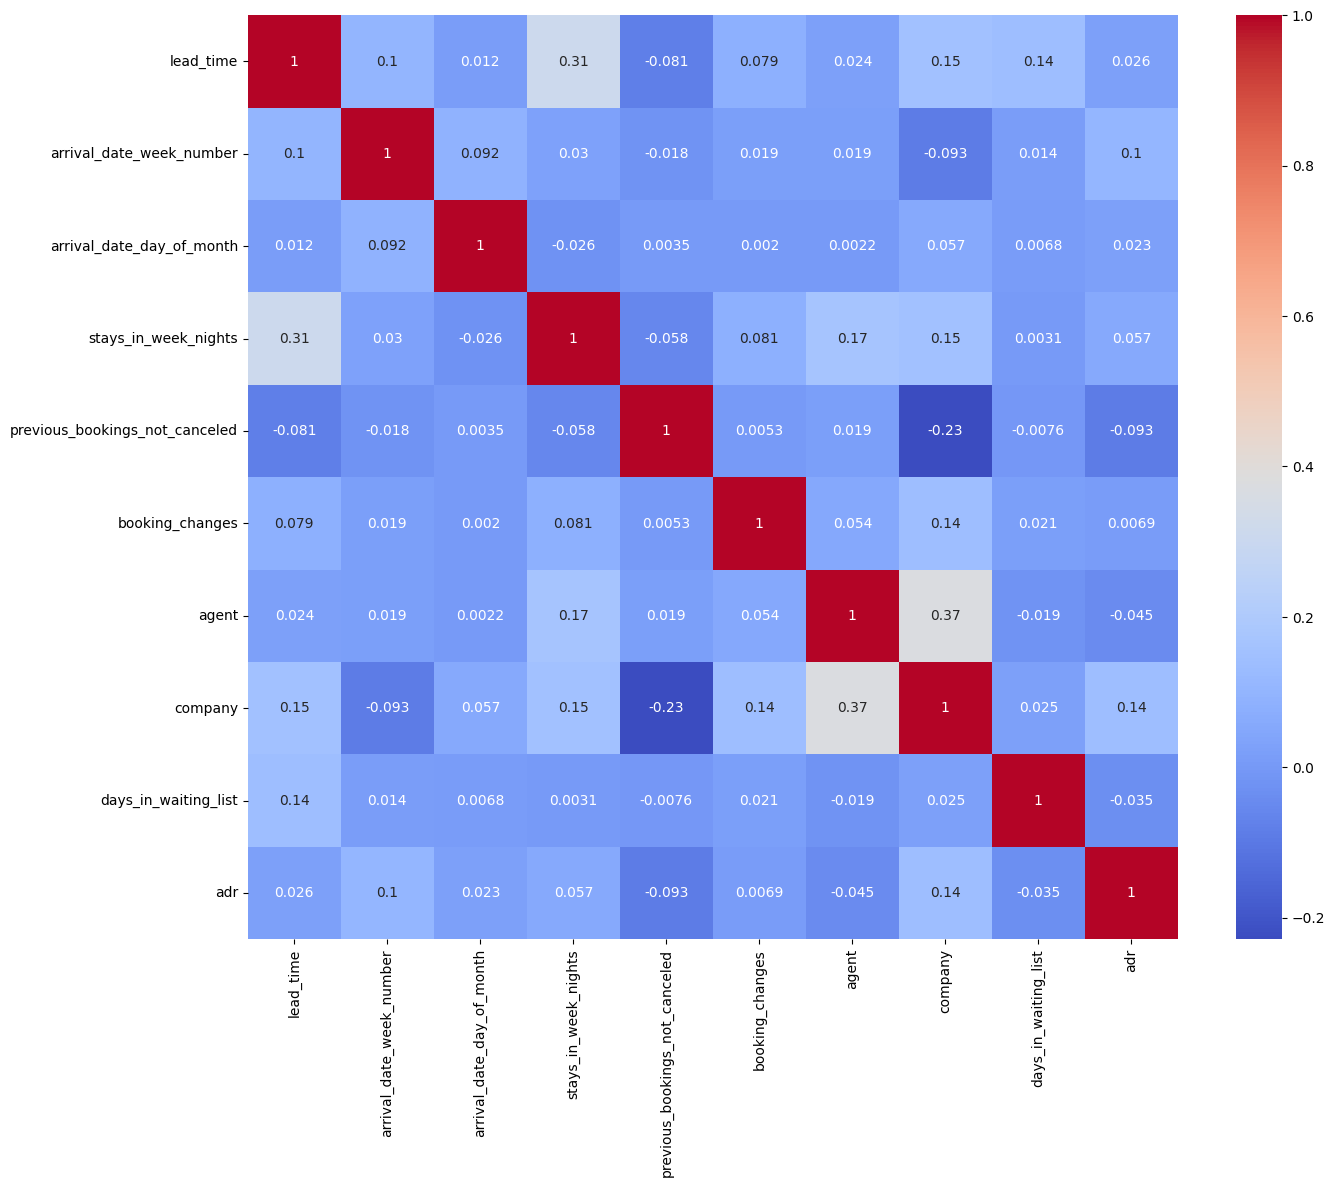

In [34]:
plt.figure(figsize=(15, 12))
# Crear un DataFrame de ejemplo
data = pd.DataFrame(hoteles)

# Calcular la matriz de correlaciones
correlation_matrix = data.corr()

# Crear un mapa de calor de la matriz de correlaciones
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Ajustar los límites de los ejes para que se muestren todas las etiquetas
plt.ylim(len(correlation_matrix), 0)
plt.xlim(0, len(correlation_matrix))

# Mostrar el mapa de calor
plt.show()